In [11]:
import numpy as np
from scipy.linalg import svd

In [12]:
#This function calculates the Eigenvectors corresponding for U and V matrices
def calcMat(M, opc):
    #Case of V Matrix
    if opc == 1:
        newM = np.dot(M.T, M)
    #Case of U Matrix
    if opc == 2:
        newM = np.dot(M, M.T)
    
    eigenvalues, eigenvectors = np.linalg.eig(newM)
    ncols = np.argsort(eigenvalues)[::-1]

    #Case of V Matrix, let's transpose it
    if opc == 1:
        return eigenvectors[:,ncols].T
    #Case of U, return normally
    else: return eigenvectors[:,ncols]
        

#Function that calculates Eigenvalues corresponding to the Sigma Matrix
def calcD(M):
    if (np.size(np.dot(M, M.T)) > np.size(np.dot(M.T, M))):
        newM = np.dot(M.T, M)
    else:
        newM = np.dot(M, M.T)
    
    eigenvalues, eigenvectors = np.linalg.eig(newM)
    eigenvalues = np.sqrt(eigenvalues)
    #Sorting in descending order as the svd function does
    return eigenvalues[::-1]

In [13]:
#Creating our matrix
A = np.array([[4, 2, 0], [1, 5, 6]])

In [14]:
#Calling the corresponding Fuctions and saving the values in variables
Vt = calcMat(A, 1)
U = calcMat(A,2)
Sigma = calcD(A)

In [15]:
print(Vt,"\n")
print(U, "\n")
print(Sigma)

[[-0.26 -0.66 -0.71]
 [-0.89 -0.12 0.44]
 [0.37 -0.74 0.56]] 

[[-0.29 -0.96]
 [-0.96 0.29]] 

[8.14 3.97]


In [16]:
U_svd, D, VT = np.linalg.svd(A)
print(VT, "\n")
print(U_svd, "\n")
print(D)

[[0.26 0.66 0.71]
 [0.89 0.12 -0.44]
 [0.37 -0.74 0.56]] 

[[0.29 0.96]
 [0.96 -0.29]] 

[8.14 3.97]


Image Compression

In [17]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

In [18]:
!pwd

/content


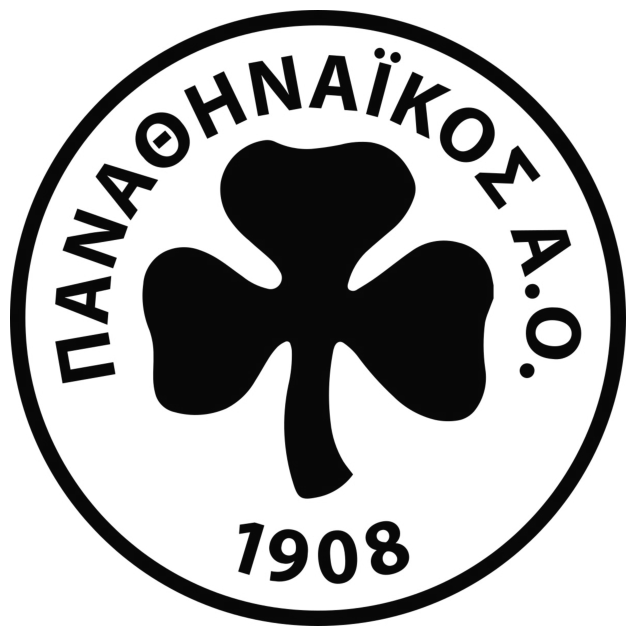

In [19]:
#Reading our image and setting the size and color
plt.rcParams['figure.figsize'] = [16, 8]

#The file MUST be in the same folder
A = imread('Pao-logo.jpg')
X = np.mean(A, -1)
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

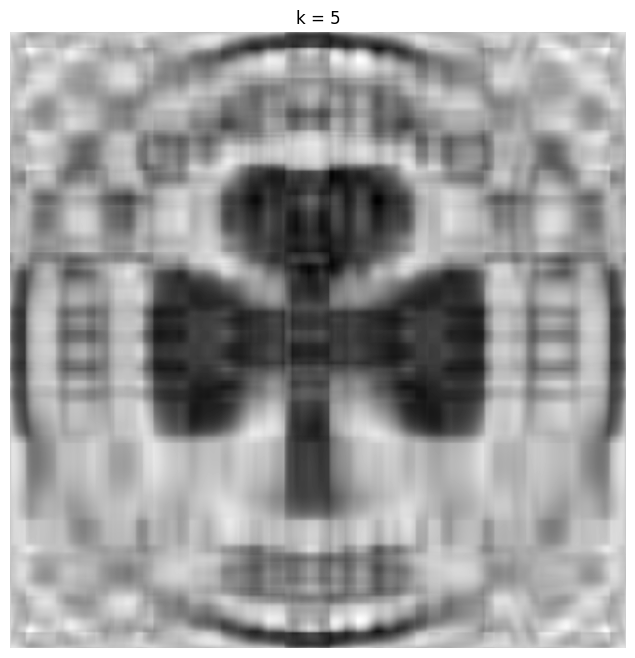

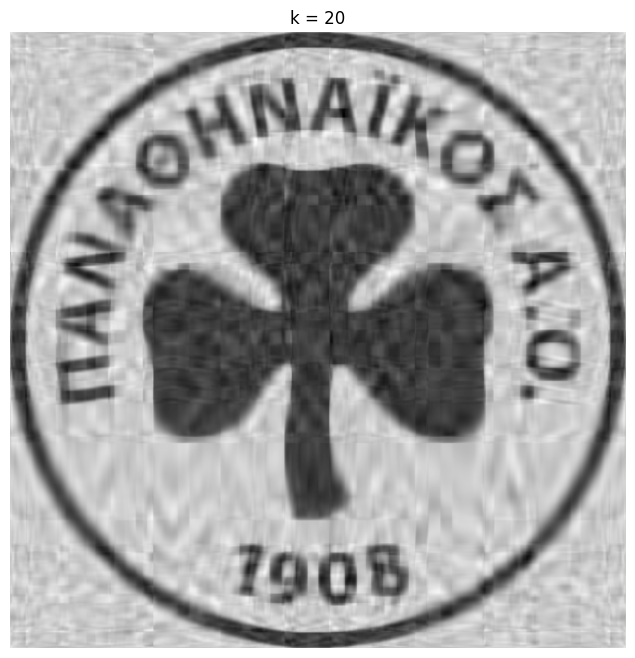

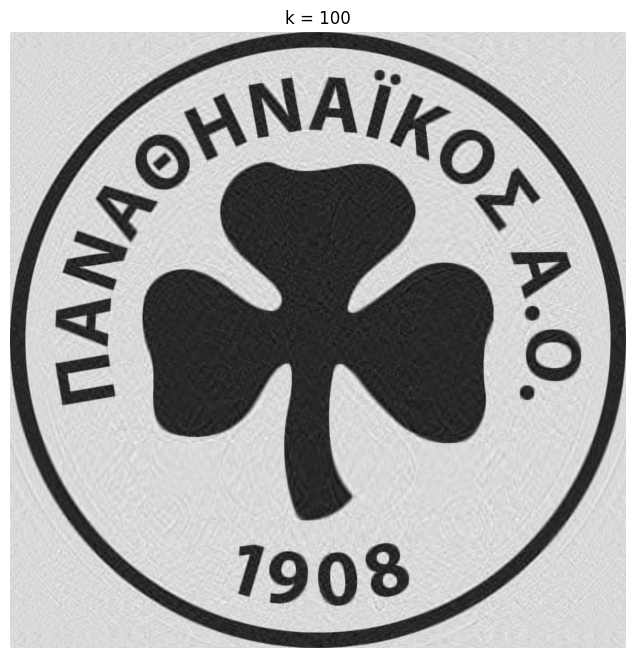

In [20]:
#Computing regular SVD
U, S, VT = np.linalg.svd(X, full_matrices = False)

#Extract Diagonal Singular Values from the Sigma Matrix
S = np.diag(S)

i = 0
for k in (5, 20, 100):
    #Constructing the approximate images in the setted ranks
    X_Ap = U[:,:k] @ S[0:k,:k] @ VT[:k,:]
    plt.figure(i+1)
    i += 1
    img = plt.imshow(X_Ap)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('k = ' + str(k))
    plt.show()